In [209]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [210]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [211]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [212]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

01-ai/Yi-1.5-9B-Chat None False datasets/mac/mac.tsv results/mac-results.csv False 300


In [213]:
%%time
os.environ["TOKENIZERS_PARALLELISM"] = "true"

!python --version
!pip show torch transformers

Python 3.11.9


python(9709) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(9710) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Name: torch
Version: 2.4.0
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, peft, torchaudio, torchvision
---
Name: transformers
Version: 4.43.3
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /Users/inflaton/anaconda3/envs/rapget/lib/python3.11/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Requi

In [214]:
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

device = check_gpu()

MPS is available


In [215]:
import pandas as pd

df = pd.read_csv(results_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Columns: 110 entries, chinese to internlm/internlm2_5-7b-chat/rpp-1.24
dtypes: object(110)
memory usage: 973.8+ KB


In [216]:
columns = df.columns[2:].to_list()
columns.remove("01-ai/Yi-1.5-34B-Chat/rpp-1.00")
columns.sort()
columns = df.columns[:2].to_list() + columns
columns

['chinese',
 'english',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.00',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.02',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.04',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.06',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.08',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.10',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.12',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.14',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.16',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.18',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.20',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.22',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.24',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.26',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.28',
 '01-ai/Yi-1.5-9B-Chat/rpp-1.30',
 'Qwen/Qwen2-72B-Instruct/rpp-1.00',
 'Qwen/Qwen2-72B-Instruct/rpp-1.02',
 'Qwen/Qwen2-72B-Instruct/rpp-1.04',
 'Qwen/Qwen2-72B-Instruct/rpp-1.06',
 'Qwen/Qwen2-72B-Instruct/rpp-1.08',
 'Qwen/Qwen2-72B-Instruct/rpp-1.10',
 'Qwen/Qwen2-72B-Instruct/rpp-1.12',
 'Qwen/Qwen2-72B-Instruct/rpp-1.14',
 'Qwen/Qwen2-72B-Instruct/rpp-1.16',
 'Qwen/Qwen2-72B-Instruct/rpp-1.18',
 'Qwen/Qwen2-72B-Instruct/rpp-1.20',
 'Qwen/Qwen2-72B-Instruct

In [217]:
df = df[columns]
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens)
metrics_df

01-ai/Yi-1.5-9B-Chat/rpp-1.00: {'meteor': 0.3463725436435439, 'bleu_scores': {'bleu': 0.09312113035602035, 'precisions': [0.37803102247546694, 0.1276225498243425, 0.05633754814082683, 0.027665603967410555], 'brevity_penalty': 1.0, 'length_ratio': 1.0463729711825107, 'translation_length': 31590, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3870139699578016, 'rouge2': 0.1488247506004683, 'rougeL': 0.33287597095291194, 'rougeLsum': 0.33363484077183997}, 'accuracy': 0.0, 'correct_ids': []}
01-ai/Yi-1.5-9B-Chat/rpp-1.02: {'meteor': 0.3471185374158656, 'bleu_scores': {'bleu': 0.09126513887574451, 'precisions': [0.37119079293382423, 0.12507213850593138, 0.055267358339984037, 0.027039160162994683], 'brevity_penalty': 1.0, 'length_ratio': 1.0706525339516395, 'translation_length': 32323, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.387830080294432, 'rouge2': 0.14937986353938124, 'rougeL': 0.3325894211716421, 'rougeLsum': 0.33382464511623333}, 'accuracy': 0.0, 'correct_ids

/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Llama3.1-8B-Chinese-Chat/rpp-1.26: {'meteor': 0.3434534163683513, 'bleu_scores': {'bleu': 0.08571979267389605, 'precisions': [0.3820319880126388, 0.11814246093485761, 0.05071393402264894, 0.023588015529997803], 'brevity_penalty': 1.0, 'length_ratio': 1.016859887379927, 'translation_length': 30699, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3869321383577401, 'rouge2': 0.14174733998072325, 'rougeL': 0.33067392953084385, 'rougeLsum': 0.3311395804213585}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Llama3.1-8B-Chinese-Chat/rpp-1.28: {'meteor': 0.34008394315191964, 'bleu_scores': {'bleu': 0.08346595677194628, 'precisions': [0.3769493732703891, 0.11567845311337976, 0.049279437609841825, 0.022585840837543013], 'brevity_penalty': 1.0, 'length_ratio': 1.0173898641934416, 'translation_length': 30715, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.38455514917396016, 'rouge2': 0.13989244725746022, 'rougeL': 0.3280102626306619, 'rougeLsum': 0.32830974480773334}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Llama3.1-8B-Chinese-Chat/rpp-1.30: {'meteor': 0.3385373237572206, 'bleu_scores': {'bleu': 0.08244181010811574, 'precisions': [0.3770232925384919, 0.11512831903769265, 0.04870072162383136, 0.021852661209674433], 'brevity_penalty': 1.0, 'length_ratio': 1.006823451473998, 'translation_length': 30396, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.38289452420576187, 'rouge2': 0.13898174896063814, 'rougeL': 0.32684753756927853, 'rougeLsum': 0.3273410937194262}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.00: {'meteor': 0.3256642047768536, 'bleu_scores': {'bleu': 0.08331314362646546, 'precisions': [0.37692207876467915, 0.11804128919273903, 0.04877450980392157, 0.022201159272356094], 'brevity_penalty': 1.0, 'length_ratio': 1.0210665783371977, 'translation_length': 30826, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.36840713201876146, 'rouge2': 0.13299426456171795, 'rougeL': 0.3161580747851038, 'rougeLsum': 0.3167048142599916}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:257: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  count_entries_with_max_tokens(df[new_col], max_output_tokens)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.02: {'meteor': 0.3261638331201866, 'bleu_scores': {'bleu': 0.08437219278343962, 'precisions': [0.37692532183274424, 0.1178213155591463, 0.04962727050012249, 0.02299311299785009], 'brevity_penalty': 1.0, 'length_ratio': 1.0214971844981782, 'translation_length': 30839, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3683327223208172, 'rouge2': 0.13298879061116414, 'rougeL': 0.3160165886106982, 'rougeLsum': 0.3166083249633809}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.04: {'meteor': 0.3261267542205407, 'bleu_scores': {'bleu': 0.0841026780937562, 'precisions': [0.37486681088760454, 0.11693142972049064, 0.04964291935202926, 0.02299184043517679], 'brevity_penalty': 1.0, 'length_ratio': 1.0258694932096721, 'translation_length': 30971, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.36784115591407124, 'rouge2': 0.13273405519793757, 'rougeL': 0.31586790820617083, 'rougeLsum': 0.31659574673209057}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.06: {'meteor': 0.32610191030444663, 'bleu_scores': {'bleu': 0.08440911364941035, 'precisions': [0.37549304881991596, 0.11705876430513139, 0.04960926597823053, 0.02328030798285756], 'brevity_penalty': 1.0, 'length_ratio': 1.0245114276250413, 'translation_length': 30930, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.36752925022525673, 'rouge2': 0.13217466088334368, 'rougeL': 0.3156161826682502, 'rougeLsum': 0.31628238804685416}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.08: {'meteor': 0.32519072627069395, 'bleu_scores': {'bleu': 0.08573531403311445, 'precisions': [0.3768451236599433, 0.11825010150223304, 0.05052246420152693, 0.023998827538196606], 'brevity_penalty': 1.0, 'length_ratio': 1.0165286518714807, 'translation_length': 30689, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3677681318911758, 'rouge2': 0.1329334511082953, 'rougeL': 0.31555219872015555, 'rougeLsum': 0.3162169797197245}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.10: {'meteor': 0.32510929376904546, 'bleu_scores': {'bleu': 0.08572184129459336, 'precisions': [0.3766598153404457, 0.11731824649366489, 0.05030826140567201, 0.024289121262153733], 'brevity_penalty': 1.0, 'length_ratio': 1.015269956939384, 'translation_length': 30651, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3669925918468957, 'rouge2': 0.1317690468418684, 'rougeL': 0.3143439978950341, 'rougeLsum': 0.31499486147109523}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12: {'meteor': 0.325321692973156, 'bleu_scores': {'bleu': 0.08501006133800607, 'precisions': [0.3769911504424779, 0.11597508254757123, 0.0496742671009772, 0.024046617983329646], 'brevity_penalty': 1.0, 'length_ratio': 1.0105995362702882, 'translation_length': 30510, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3670918439535572, 'rouge2': 0.1306394142574278, 'rougeL': 0.3136378009708979, 'rougeLsum': 0.31448454091818295}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14: {'meteor': 0.3224620858016468, 'bleu_scores': {'bleu': 0.08389328832417228, 'precisions': [0.3779330345373056, 0.11529903118688166, 0.048935109338271957, 0.02322992429864925], 'brevity_penalty': 1.0, 'length_ratio': 1.0051010268300762, 'translation_length': 30344, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3660029478823349, 'rouge2': 0.12962198881927703, 'rougeL': 0.3130154415556936, 'rougeLsum': 0.3138353845845071}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16: {'meteor': 0.32354623636120206, 'bleu_scores': {'bleu': 0.08389983318570625, 'precisions': [0.3772855017358241, 0.11575982412750756, 0.04921372408863474, 0.02305314513425943], 'brevity_penalty': 1.0, 'length_ratio': 1.0018217952964559, 'translation_length': 30245, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.365798410378833, 'rouge2': 0.13022724788126894, 'rougeL': 0.31361563891120947, 'rougeLsum': 0.31418770957030584}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18: {'meteor': 0.3227464993995023, 'bleu_scores': {'bleu': 0.08237511984991769, 'precisions': [0.37662723848542917, 0.11529880204579, 0.04821256383700582, 0.02199315272402501], 'brevity_penalty': 1.0, 'length_ratio': 1.0025173898641935, 'translation_length': 30266, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3649625928411872, 'rouge2': 0.1297823979809622, 'rougeL': 0.31237472571694164, 'rougeLsum': 0.3130341342775994}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20: {'meteor': 0.3213479416591043, 'bleu_scores': {'bleu': 0.08021470447158471, 'precisions': [0.3734951746094916, 0.11340454858718126, 0.046686746987951805, 0.021039650211143915], 'brevity_penalty': 0.9987736772994305, 'length_ratio': 0.9987744286187479, 'translation_length': 30153, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3633099524507924, 'rouge2': 0.1279994669647978, 'rougeL': 0.31081287893463483, 'rougeLsum': 0.311576974320659}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22: {'meteor': 0.31939727082775615, 'bleu_scores': {'bleu': 0.08027275774782588, 'precisions': [0.37060882197569994, 0.11191905333561997, 0.04649751989437248, 0.021528965568528298], 'brevity_penalty': 1.0, 'length_ratio': 1.0032461079827757, 'translation_length': 30288, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3609380986777075, 'rouge2': 0.12666125324918132, 'rougeL': 0.3089835285121734, 'rougeLsum': 0.30956638915014134}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.24: {'meteor': 0.3188662188138966, 'bleu_scores': {'bleu': 0.07877965659256216, 'precisions': [0.3695673695673696, 0.11004456633527597, 0.045509665454026675, 0.020810881117841615], 'brevity_penalty': 1.0, 'length_ratio': 1.0037429612454456, 'translation_length': 30303, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.35966629764151414, 'rouge2': 0.1255987660701956, 'rougeL': 0.30728620231759696, 'rougeLsum': 0.3077173322184259}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.26: {'meteor': 0.31805084189335, 'bleu_scores': {'bleu': 0.07777595035895293, 'precisions': [0.36718209093007154, 0.10867182683745462, 0.04475165680895033, 0.020491498997698417], 'brevity_penalty': 1.0, 'length_ratio': 1.0046704206690957, 'translation_length': 30331, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3586578737816579, 'rouge2': 0.12488061546195132, 'rougeL': 0.30667694159970027, 'rougeLsum': 0.30730677797657274}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.28: {'meteor': 0.31564132115319793, 'bleu_scores': {'bleu': 0.07471248687074669, 'precisions': [0.3653415084388186, 0.1064959079546622, 0.0426418723949984, 0.018780388226997735], 'brevity_penalty': 1.0, 'length_ratio': 1.004836038423319, 'translation_length': 30336, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.3575069575446436, 'rouge2': 0.12384165440953143, 'rougeL': 0.3046949012325021, 'rougeLsum': 0.3054690222171944}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.30: {'meteor': 0.31448483374273595, 'bleu_scores': {'bleu': 0.07484673889486904, 'precisions': [0.36305669679539854, 0.10600163867267513, 0.04272017045454545, 0.01908848771825984], 'brevity_penalty': 1.0, 'length_ratio': 1.007784034448493, 'translation_length': 30425, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.35601587422350284, 'rouge2': 0.1229164691279465, 'rougeL': 0.3035257437090866, 'rougeLsum': 0.30386441333286196}, 'accuracy': 0.0, 'correct_ids': []}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:262: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  metrics_df["rouge_l"] = rouge_l


model   rpp    meteor    bleu_1  \
0                         01-ai/Yi-1.5-9B-Chat  1.00  0.346373  0.093121   
1                         01-ai/Yi-1.5-9B-Chat  1.02  0.347119  0.091265   
2                         01-ai/Yi-1.5-9B-Chat  1.04  0.347188  0.090199   
3                         01-ai/Yi-1.5-9B-Chat  1.06  0.347595  0.090050   
4                         01-ai/Yi-1.5-9B-Chat  1.08  0.347511  0.090048   
..                                         ...   ...       ...       ...   
102  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.22  0.319397  0.080273   
103  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.24  0.318866  0.078780   
104  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.26  0.318051  0.077776   
105  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.28  0.315641  0.074712   
106  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat  1.30  0.314485  0.074847   

      rouge_l  ews_score  repetition_score  total_repetitions       rap  \
0    0.332876        0.0          0.351280           0.351280  0.341256   
1    0.332589        0.0          0.264784           0.264784  0.343223   
2    0.331946        0.0          0.377758           0.377758  0.341686   
3    0.331282        0.0          0.468667           0.468667  0.340815   
4    0.331427        0.0          0.311562           0.311562  0.342942   
..        ...        ...               ...                ...       ...   
102  0.308984        0.0          0.100618           0.100618  0.318015   
103  0.307286        0.0          0.082083           0.082083  0.317738   
104  0.306677        0.0          0.073257           0.073257  0.317046   
105  0.304695        0.0          0.057370           0.057370  0.314859   
106  0.303526        0.0          0.067961           0.067961  0.313562   

     num_max_output_tokens  
0                        2  
1                        4  
2                        8  
3                        9  
4                        4  
..                     ...  
102                      0  
103                      0  
104                      0  
105                      0  
106                      0  

[107 rows x 10 columns]

In [218]:
models = metrics_df["model"].unique()
models

loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


array(['01-ai/Yi-1.5-9B-Chat', 'Qwen/Qwen2-72B-Instruct',
       'Qwen/Qwen2-7B-Instruct', 'internlm/internlm2_5-7b-chat',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat'], dtype=object)

In [219]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

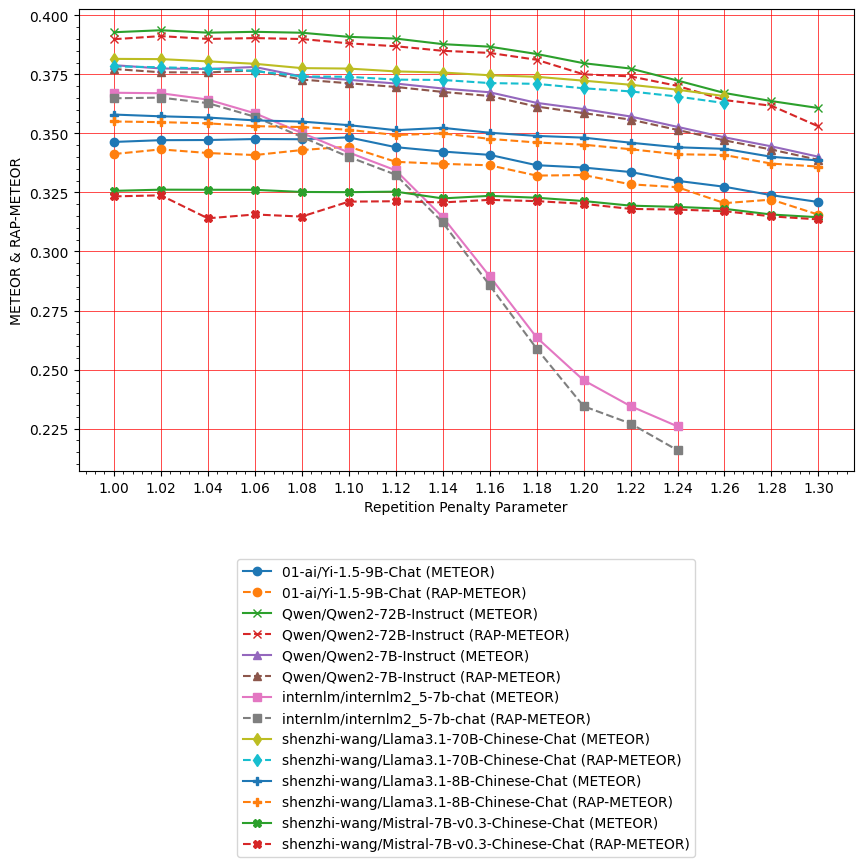

In [220]:
# plot meteor vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(
        model_df["rpp"],
        model_df["meteor"],
        label=model + " (METEOR)",
        marker=markers[model],
    )
    ax.plot(
        model_df["rpp"],
        model_df["rap"],
        label=model + " (RAP-METEOR)",
        linestyle="--",
        marker=markers[model],
    )

ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("METEOR & RAP-METEOR")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.85))
plt.show()

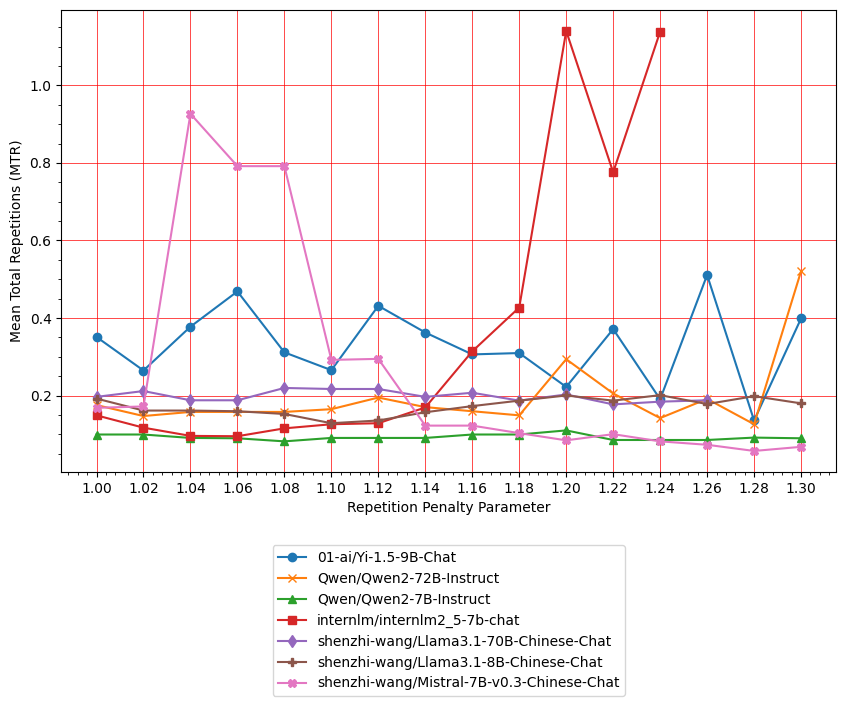

In [221]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(
    which="major", linestyle="-", linewidth="0.5", color="red"
)
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(
        model_df["rpp"],
        model_df["total_repetitions"],
        label=model,
        marker=markers[model],
    )

# ax.set_ylim(0, 1)
ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Mean Total Repetitions (MTR)")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5))
plt.show()

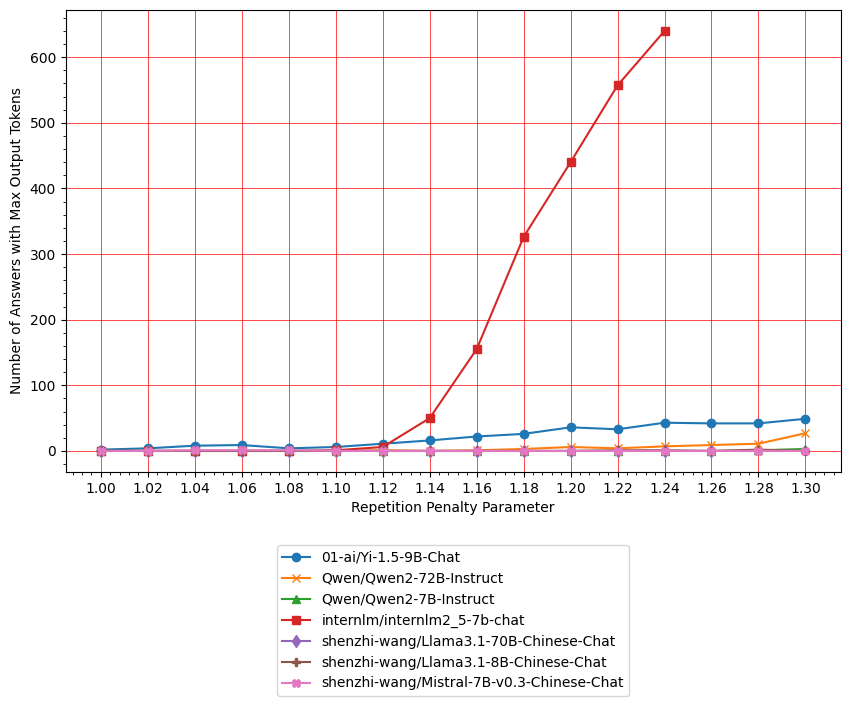

In [222]:
# plot mtr vs rpp
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
# set grid
ax.grid(True)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")
# ax.grid(which="minor", linestyle=":", linewidth="0.5", color="black")

for model in models:
    model_df = metrics_df[metrics_df["model"] == model]
    ax.plot(model_df["rpp"], model_df["num_max_output_tokens"], label=model, marker=markers[model])

# ax.set_ylim(0, 1)
ax.set_xlabel("Repetition Penalty Parameter")
ax.set_ylabel("Number of Answers with Max Output Tokens")
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5))
plt.show()

In [223]:
def detect_repetitions_for_model_outputs(df, col, threshold=100):
    df[["ews_score", "repetition_score", "total_repetitions"]] = df[col].apply(
        detect_scores
    )
    return df.query(f"total_repetitions > {threshold}")

In [224]:
col = "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.04"
rows = detect_repetitions_for_model_outputs(df, col)
rows

chinese                                    english  \
193  “有…… 没有…… 有…… 没有……     'Yes . . . no . . . yes . . . no . . .   
759           我是个什么东西儿!  What sort of creature do you take me for?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.00 01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
193       "Yes…… no…… yes…… no……"       "Yes…… no…… yes…… no……"   
759      What kind of thing am I!      What kind of thing am I!   

    01-ai/Yi-1.5-9B-Chat/rpp-1.04 01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
193       "Yes…… no…… yes…… no……"       "Yes…… no…… yes…… no……"   
759      What kind of thing am I?      What kind of thing am I?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.08 01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
193           "Yes… no… Yes… no…"           "Yes… no… Yes… no…"   
759      What kind of thing am I?      What kind of thing am I?   

    01-ai/Yi-1.5-9B-Chat/rpp-1.12 01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
193           "Yes… no… Yes… no…"           "Yes… no… Yes… No…"  ...   
759      What kind of thing am I?      What kind of thing am I?  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
193                                                142                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
193                                                  9                 
759                                                  6                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
193                                                  9                 
759                                                 15                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.24  \
193                                                  9                 
759                                                 11                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.26  \
193                                                  9                 
759                                                 11                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.28  \
193                                                  9                 
759                                                 36                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.30  
193                                                  9                
759                                                 36                

[2 rows x 229 columns]

In [225]:
row = rows.iloc[0]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

“有…… 没有…… 有…… 没有……
'Yes . . . no . . . yes . . . no . . .
Yes, I can help you with that! Here's the translation:

"Yes, I can help you with that! Here's the translation:

有 - Yes
没有 - No

So, the translated content is:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translation:

Yes, I can help you with that! Here's the translatio

(0, 784, 784)

In [226]:
row = rows.iloc[1]
print(row["chinese"])
print(row["english"])
output = row[col]
print(output)
detect_repetitions(output, debug=True)

我是个什么东西儿!
What sort of creature do you take me for?
I am a Chinese-English translator. Here is the translation of the text:

"I am a Chinese-English translator. Here is the translation of the text:

"What am I?"

The answer is: "I am a Chinese-English translator."
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(0, 148), match='I am a Chinese-English translator. Here is the tr>
Group 1 found at 0-74: `I am a Chinese-English translator. Here is the translation of the text:

"`
Group 2 found at 74-148: `I am a Chinese-English translator. Here is the translation of the text:

"`
Group 3 found at 74-148: `I am a Chinese-English translator. Here is the translation of the text:

"`
(0, 148, 148)


(0, 148, 148)

In [227]:
col = "Qwen/Qwen2-7B-Instruct/rpp-1.00"
rows = detect_repetitions_for_model_outputs(df, col, threshold=50)
rows

chinese  \
327  短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短...   

                                               english  \
327  short-long-long-long-long, short-long-long-lon...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
327  This is a sequence of words and numbers: "长长长长...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.04  \
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.08  \
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.12  \
327  This is a sequence of words: "short long long ...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
327  This is a sequence of words: "short long long ...  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
327                                                 83                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
327                                                 61                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
327                                                 81                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
327                                                 71                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.24  \
327                                                 65                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.26  \
327                                                 64                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.28  \
327                                                120                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.30  
327                                                202                

[1 rows x 229 columns]

In [228]:
for i, row in rows.iterrows():
    print(row["chinese"])
    print("=" * 80)
    print(row["english"])
    print("=" * 80)
    output = row[col]
    print(output)
    print("=" * 80)
    detect_repetitions(output, debug=True)

短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
The sequence you provided seems to be a series of patterns or codes, possibly related to a specific context or system. Here is the translation of the sequence into English:

"Short long long long, short long long long, short short short short, long long short short, long long short long, short short long long, short short short long, long long short long, long long short short."

This sequence, "1108:21:37," appears to be a timestamp or a code. However, without additional context, it's unclear what this sequence represents or how it relates to the preceding text.
----detect excessive whitespaces

In [229]:
output_tokens = f"output_tokens-{col}"
df2 = df[df[output_tokens] >= max_new_tokens][
    ["chinese", "english", col, output_tokens]
]
print_row_details(df2, range(len(df2)))

In [230]:
len(df2)

0

In [231]:
col = "internlm/internlm2_5-7b-chat/rpp-1.00"
rows = detect_repetitions_for_model_outputs(df, col, threshold=30)
rows

chinese  \
193                                  “有…… 没有…… 有…… 没有……   
327   短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短...   
1045       高粱挺拔的秆子，排成密集的栅栏，模模糊糊地隐藏在气体的背后，穿过一排又一排，排排无尽头。   

                                                english  \
193              'Yes . . . no . . . yes . . . no . . .   
327   short-long-long-long-long, short-long-long-lon...   
1045  Erect stalks of sorghum formed dense barriers ...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
193                             "Yes…… no…… yes…… no……"   
327   This is a sequence of words and numbers: "长长长长...   
1045  The tall stalks of sorghum form a dense fence,...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
193                             "Yes…… no…… yes…… no……"   
327   This is a sequence of words: "short long long ...   
1045  The tall stalks of sorghum form a dense fence,...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.04  \
193                             "Yes…… no…… yes…… no……"   
327   This is a sequence of words: "short long long ...   
1045  The tall stalks of sorghum form a dense fence,...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
193                             "Yes…… no…… yes…… no……"   
327   This is a sequence of words: "short long long ...   
1045  The tall stalks of sorghum form a dense fence,...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.08  \
193                                 "Yes… no… Yes… no…"   
327   This is a sequence of words: "short long long ...   
1045  The tall stalks of sorghum form a dense fence,...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
193                                 "Yes… no… Yes… no…"   
327   This is a sequence of words: "short long long ...   
1045  The tall stalks of sorghum form a dense fence,...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.12  \
193                                 "Yes… no… Yes… no…"   
327   This is a sequence of words: "short long long ...   
1045  The tall stalks of sorghum form a dense fence,...   

                          01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
193                                 "Yes… no… Yes… No…"  ...   
327   This is a sequence of words: "short long long ...  ...   
1045  The tall stalks of sorghum form a dense fence,...  ...   

     output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
193                                                 142                 
327                                                  83                 
1045                                                 33                 

     output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
193                                                   9                 
327                                                  61                 
1045                                                 33                 

     output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
193                                                   9                 
327                                                  81                 
1045                                                 33                 

     output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.18  \
193                                                   9                 
327                                                  71                 
1045                                                 33                 

     output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.20  \
193                                                   9                 
327                                                  71                 
1045                                                 33                 

     output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.22  \
193                                                   9                 
327                                            

In [232]:
for i in range(len(rows)):
    row = rows.iloc[i]
    print(row["chinese"])
    print("=" * 80)
    print(row["english"])
    print("=" * 80)
    output = row[col]
    print(output)
    print("=" * 80)
    detect_repetitions(output, debug=True)

“有…… 没有…… 有…… 没有……
'Yes . . . no . . . yes . . . no . . .
"Have... Don't have... Have... Don't have..."
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(1, 44), match="Have... Don't have... Have... Don't have...">
Group 1 found at 1-22: `Have... Don't have...`
Group 2 found at 23-44: `Have... Don't have...`
Group 3 found at 23-44: `Have... Don't have...`
(0, 43, 43)
短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
Short long long long, short long long long, short short short, long long short, long long short long, short short long long, short short short, long long short long, short short short long,

In [233]:
output_tokens = f"output_tokens-{col}"
df2 = df[df[output_tokens] >= max_new_tokens][
    ["chinese", "english", col, output_tokens]
]
print_row_details(df2, range(len(df2)))

In [234]:
len(df2)

0

In [235]:
col = "01-ai/Yi-1.5-9B-Chat/rpp-1.00"
rows = detect_repetitions_for_model_outputs(df, col, threshold=50)
rows

chinese  \
327  短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短...   
366        你只顾一时为我得罪了人，他们都记在心里，遇着坎儿，说的好说不好听的，大家什么意思呢？”   
447            这些真东西是体面后头的东西，它们是说给自己也不敢听的，于是就拿来，制作流言了。   
614                             在我看来，这东西无比重要，就如我之存在本身。   

                                               english  \
327  short-long-long-long-long, short-long-long-lon...   
366  You don't seem to realize. You offend people o...   
447  These articles lie outside the parameters of w...   
614  To me, the thing was extremely important, as i...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
327  This is a sequence of words and numbers: "长长长长...   
366  You have offended people for me temporarily, a...   
447  These genuine items are the things that follow...   
614  In my opinion, this thing is infinitely import...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
327  This is a sequence of words: "short long long ...   
366  You have offended people for me temporarily, a...   
447  These genuine things are what one possesses af...   
614  In my opinion, this thing is infinitely import...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.04  \
327  This is a sequence of words: "short long long ...   
366  You have offended people for me temporarily, a...   
447  These genuine things are what one possesses af...   
614  In my opinion, this thing is infinitely import...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.06  \
327  This is a sequence of words: "short long long ...   
366  You have offended people for me temporarily, a...   
447  These genuine items are things of consequence,...   
614  In my opinion, this thing is infinitely import...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.08  \
327  This is a sequence of words: "short long long ...   
366  You have offended people for me temporarily, a...   
447  These genuine items are things of consequence;...   
614  In my opinion, this thing is infinitely import...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.10  \
327  This is a sequence of words: "short long long ...   
366  You have offended people for me temporarily, a...   
447  These genuine things are what one possesses af...   
614  In my opinion, this thing is infinitely import...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.12  \
327  This is a sequence of words: "short long long ...   
366  You have offended people for me temporarily, a...   
447  These genuine things are what one possesses af...   
614  In my opinion, this thing is infinitely import...   

                         01-ai/Yi-1.5-9B-Chat/rpp-1.14  ...  \
327  This is a sequence of words: "short long long ...  ...   
366  You have offended people for me temporarily, a...  ...   
447  These genuine items are things of consequence;...  ...   
614  In my opinion, this thing is infinitely import...  ...   

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
327                                                 83                 
366                                                 37                 
447                                                 32                 
614                                                 17                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.14  \
327                                                 61                 
366                                                 41                 
447                                                 33                 
614                                                 17                 

    output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.16  \
327                                                 81                 
366                                                 41                 
447                                                 32                 
614                                                 17                 

    output_tokens-shenzhi-wan

In [236]:
for i in range(len(rows)):
    row = rows.iloc[i]
    print(row["chinese"])
    print("=" * 80)
    print(row["english"])
    print("=" * 80)
    output = row[col]
    print(output)
    print("=" * 80)
    detect_repetitions(output, debug=True)

短长长长长、短长长长长、短短短短短、长长长短短、长长短短长长、短短长长长、短短短短长、长长短短长长、短短短长长、长长短短短，这是1108：21：37。
short-long-long-long-long, short-long-long-long-long, long-long-long-long-long, long-long-long-short-short, long-long-long-short-short-short, short-short-long-long-long, short-long-long-long-long, long-long-long-short-short-short, short-short-short-long-long, long-long-short-short-short. That's 1108:21:37, Wang thought.
This is a sequence of words and numbers: "长长长长短、 长长长长短、 短短短短短、 长长短短长、 长短长长长、 短短长长短、 短短短长长、 长短长长长、 短短长长短、 长短短长长、 短短短短长、 长短长长长、 短短短长长、 短短短短长、 短长长短长、 短长长长短、 短短长长长、 短长长短长、 短长长长短、 短短长长长、 长短长长长、 短短短长长、 长短长长长、 短短短短长、 长长短短长、 短长长长长、 短长长长长、 短短短短短、 长长长短短、 长长短长长、 短短长长长、 短短短短长、 长长短短长、 短长长长短、 短长长短长、 短长长长短、 短短长长长、 短长长短长、 短长长长短、 短短长长长、 短长长短长、 短长长长短、 短短长长长、 短
----detect excessive whitespaces----
----detect text repetitions----
<re.Match object; span=(42, 56), match='长长长长短、 长长长长短、 '>
Group 1 found at 42-49: `长长长长短、 `
Group 2 found at 49-56: `长长长长短、 `
Group 3 found at 49-56: `长长长长短、 `
<re.Match object; span=(122, 

In [237]:
output_tokens = f"output_tokens-{col}"
df2 = df[df[output_tokens] >= max_new_tokens][
    ["chinese", "english", col, output_tokens]
]
print_row_details(df2, range(len(df2)))

--------------------------------------------------
chinese: 那刘姥姥先听见告艰苦，只当是没想头了， 又听见给他二十两银子，喜的眉开眼笑道：“我们也知道艰难的，但只俗语说的：‘瘦死的骆驼比马还大’呢。
--------------------------------------------------
english: When Grannie Liu heard Xi-feng talk about 'difficulties' she concluded that there was no hope. Her delight and the way in which her face lit up with pleasure when she heard that she was, after all, to be given twenty taels of silver can be imagined. 'We knew you had your troubles,' she said, 'but as the saying goes, 'A starved camel is bigger than a fat horse.'
--------------------------------------------------
01-ai/Yi-1.5-9B-Chat/rpp-1.00: First, I will identify the key phrases and words in the Chinese text that need to be translated. Then, I will translate each phrase or word into English, considering the context and meaning. Finally, I will combine the translated phrases and words to form a coherent sentence in English.

1. 那刘姥姥 (That Diao Huarou) - Diao Huarou is a character's name, so it remai

In [238]:
len(df2)

2

In [239]:
df.describe()

ground_truth_ews_score  ground_truth_repetition_score  \
count                  1133.0                    1133.000000   
mean                      0.0                       0.312445   
std                       0.0                       7.193649   
min                       0.0                       0.000000   
25%                       0.0                       0.000000   
50%                       0.0                       0.000000   
75%                       0.0                       0.000000   
max                       0.0                     239.000000   

       ground_truth_total_repetitions  ews_score  repetition_score  \
count                     1133.000000     1133.0       1133.000000   
mean                         0.312445        0.0          0.489850   
std                          7.193649        0.0          6.844121   
min                          0.000000        0.0          0.000000   
25%                          0.000000        0.0          0.000000   
50%                          0.000000        0.0          0.000000   
75%                          0.000000        0.0          0.000000   
max                        239.000000        0.0        147.000000   

       total_repetitions  ground_truth_tokens-01-ai/Yi-1.5-9B-Chat  \
count        1133.000000                               1133.000000   
mean            0.489850                                 33.044131   
std             6.844121                                 22.889653   
min             0.000000                                  1.000000   
25%             0.000000                                 17.000000   
50%             0.000000                                 28.000000   
75%             0.000000                                 42.000000   
max           147.000000                                154.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.00  \
count                                  1133.000000   
mean                                     35.954104   
std                                      31.319419   
min                                       1.000000   
25%                                      18.000000   
50%                                      28.000000   
75%                                      44.000000   
max                                     320.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.02  \
count                                  1133.000000   
mean                                     36.389232   
std                                      33.350099   
min                                       1.000000   
25%                                      18.000000   
50%                                      28.000000   
75%                                      44.000000   
max                                     332.000000   

       output_tokens-01-ai/Yi-1.5-9B-Chat/rpp-1.04  ...  \
count                                  1133.000000  ...   
mean                                     37.240953  ...   
std                                      36.431663  ...   
min                                       1.000000  ...   
25%                                      18.000000  ...   
50%                                      28.000000  ...   
75%                                      44.000000  ...   
max                                     326.000000  ...   

       output_tokens-shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/rpp-1.12  \
count                                        1133.000000                  
mean                                           32.159753                  
std                                            22.421439                  
min                                             3.000000                  
25%                                            17.000000                  
50%                                            27.000000                  
75%                                            41.000000                  
max                                           212.000000      

In [240]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)